In [91]:
#pip install yfinance
#from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
#import talib as ta
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.pipeline import Pipeline
#from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
#from sklearn import preprocessing
#from sklearn import utils

# Open data

In [2]:
#Open Data, generated in the last question.
df=pd.read_csv('BTC_TECH_ANAL1.csv')
df.head()

,Date,Close,Open_lag1,High_lag1,Low_lag1,Close_lag1,Adj Close_lag1,Volume_lag1,AROONOSC_lag1,RSI_lag1,...,AD_lag1,OBV_lag1,ATR_lag1,NATR_lag1,TRANGE_lag1,CDLENGULFING_lag1,CDLHANGINGMAN_lag1,CDLSHOOTINGSTAR_lag1,CDLHAMMER_lag1,Unnamed: 21
0,13/10/2017,5647.209961,4829.580078,5446.910156,4822.000000,5446.910156,5446.910156,2.791610e+09,100.000000,95.599259,...,5.757130e+09,1.382015e+10,245.291755,3.627589,197.591518,0,0,0,0,NaN
1,14/10/2017,5831.790039,5464.160156,5840.299805,5436.850098,5647.209961,5647.209961,3.615480e+09,100.000000,96.443426,...,5.911893e+09,1.743563e+10,271.651413,3.759302,212.295674,0,0,0,0,NaN
2,15/10/2017,5678.189941,5643.529785,5837.700195,5591.640137,5831.790039,5831.790039,1.669030e+09,83.333333,97.065831,...,7.500746e+09,1.910466e+10,267.386188,3.681673,214.707416,0,0,0,0,NaN
3,16/10/2017,5725.589844,5835.959961,5852.479980,5478.609863,5678.189941,5678.189941,1.976040e+09,100.000000,82.626458,...,7.634413e+09,1.712862e+10,285.133509,3.981483,226.076180,0,0,0,0,NaN
4,17/10/2017,5605.509766,5687.569824,5776.229980,5544.209961,5725.589844,5725.589844,2.008070e+09,66.666667,83.533546,...,8.765930e+09,1.913669e+10,276.281261,3.955937,226.500740,0,0,0,0,NaN


In [112]:
#Separate the dataset in dependent an independent variable
# X tech indicators without AT
X=df.drop(['Date', 'Close','Open_lag1','High_lag1','Low_lag1','Close_lag1','Adj Close_lag1','Volume_lag1','Unnamed: 21','ATR_lag1','RSI1_lag1','AD_lag1'], axis=1)
# y is Close BTC Price
y=df['Close']

,AROONOSC_lag1,RSI_lag1,DX_lag1,OBV_lag1,NATR_lag1,TRANGE_lag1,CDLENGULFING_lag1,CDLHANGINGMAN_lag1,CDLSHOOTINGSTAR_lag1,CDLHAMMER_lag1
AROONOSC_lag1,1.000000,0.751186,0.066016,0.114718,-0.177959,-0.031008,0.069388,-0.005549,-0.044710,-0.095964
RSI_lag1,0.751186,1.000000,0.047264,0.164944,-0.267501,-0.051737,0.166334,-0.047903,-0.067331,-0.096228
DX_lag1,0.066016,0.047264,1.000000,0.024605,-0.009513,0.001504,-0.015437,0.037952,-0.024863,-0.024902
OBV_lag1,0.114718,0.164944,0.024605,1.000000,0.095164,0.748881,0.057848,-0.010977,0.009854,-0.035679
NATR_lag1,-0.177959,-0.267501,-0.009513,0.095164,1.000000,0.577738,-0.083389,0.013482,0.029817,0.013423
TRANGE_lag1,-0.031008,-0.051737,0.001504,0.748881,0.577738,1.000000,0.009727,0.009415,0.019172,-0.033627
CDLENGULFING_lag1,0.069388,0.166334,-0.015437,0.057848,-0.083389,0.009727,1.000000,0.020587,0.003701,-0.018461
CDLHANGINGMAN_lag1,-0.005549,-0.047903,0.037952,-0.010977,0.013482,0.009415,0.020587,1.000000,-0.014302,-0.031382
CDLSHOOTINGSTAR_lag1,-0.044710,-0.067331,-0.024863,0.009854,0.029817,0.019172,0.003701,-0.014302,1.000000,0.019596
CDLHAMMER_lag1,-0.095964,-0.096228,-0.024902,-0.035679,0.013423,-0.033627,-0.018461,-0.031382,0.019596,1.000000


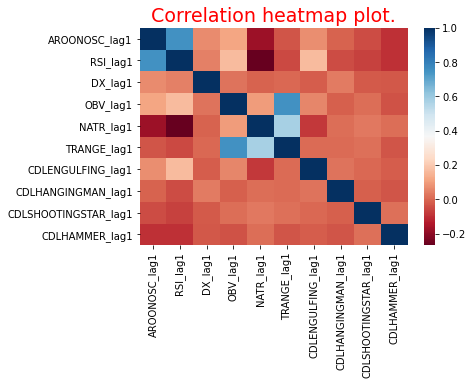

In [26]:
#Drop correlated variables ATR_lag1, RSI1_lag1 & AD_lag1
corr=X.corr()
display(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')
plt.title('Correlation heatmap plot.', fontsize=19,  color='red')
plt.show()

In [27]:
# Split Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [155]:
#Standard Scaling training set
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

array([[ 1.0923499 ,  1.55734962, -0.97360293, ...,  0.138117  ,
         0.094585  , -0.18898224],
       [ 0.84979135,  0.97288777,  0.77076706, ...,  0.138117  ,
         0.094585  , -0.18898224],
       [-0.36300142,  0.08546548, -0.31535402, ...,  0.138117  ,
         0.094585  , -0.18898224],
       ...,
       [-1.57579419, -1.35129412,  0.99036114, ...,  0.138117  ,
         0.094585  ,  5.29150262],
       [ 1.0923499 ,  0.4163204 , -0.58607226, ...,  0.138117  ,
         0.094585  , -0.18898224],
       [ 0.60723279,  0.08488827, -1.58745852, ..., -7.24023844,
         0.094585  , -0.18898224]])

# 3.3 Support Vector Machines

In [92]:
#Support Vector Model
from sklearn import svm
svm_= svm.SVR()
svm_.fit(X_train,y_train)
y_predict=svm_.predict(X_test)

In [93]:
#Mean Squared Error
print(mean_squared_error(y_test, y_predict))

163268553.93019083


# 3.4 Decision Tree Model

In [100]:
# Decision Tree
from sklearn import tree
dt= tree.DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_predict=dt.predict(X_test)

In [101]:
print(mean_squared_error(y_test, y_predict))

2026574.7447137102


In [111]:
#score(X_test, y_predict[,sample_weight=None])
from sklearn.model_selection import cross_val_score
#score(X_test, y_predict, sample_weight=None)
cross_val_score(dt, X_test, X_test, cv=10)

array([0.74350217, 0.73739054, 0.64626638, 0.75827873, 0.83967345,
       0.81252907, 0.65789309, 0.82947964, 0.66813193, 0.72894449])

# Ordinary Least Squares

In [72]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
reg.coef_
y_predict=reg.predict(X_test)

In [73]:
print(mean_squared_error(y_test, y_predict))

10937309.488104336


In [141]:
coef=reg.coef_
coef

array([ 2.70478989e+02,  2.57960566e+02,  1.04082800e+02,  3.79983193e+03,
       -2.85731759e+03,  1.14688645e+04, -2.00595523e+02, -1.73805154e+01,
       -6.24430276e+01, -6.46696225e-01])

In [122]:
#BTC_actual=data_scaled[['Close']]  es y
BTC_fitted= X.dot(coef)
#acrual values is y
BTC_actual=y

date=df['Date']

In [137]:
BTC_fitted

0       5.251424e+13
1       6.625246e+13
2       7.259449e+13
3       6.508587e+13
4       7.271620e+13
            ...     
1349    6.006242e+15
1350    6.141212e+15
1351    6.012398e+15
1352    6.156450e+15
1353    6.027027e+15
Length: 1354, dtype: float64

In [138]:
BTC_actual

0        5647.209961
1        5831.790039
2        5678.189941
3        5725.589844
4        5605.509766
            ...     
1349    34649.644530
1350    34434.335940
1351    35867.777340
1352    35040.835940
1353    33572.117190
Name: Close, Length: 1354, dtype: float64

In [139]:
X

,AROONOSC_lag1,RSI_lag1,DX_lag1,OBV_lag1,NATR_lag1,TRANGE_lag1,CDLENGULFING_lag1,CDLHANGINGMAN_lag1,CDLSHOOTINGSTAR_lag1,CDLHAMMER_lag1
0,100.000000,95.599259,97.635023,1.382015e+10,3.627589,197.591518,0,0,0,0
1,100.000000,96.443426,98.942339,1.743563e+10,3.759302,212.295674,0,0,0,0
2,83.333333,97.065831,98.942339,1.910466e+10,3.681673,214.707416,0,0,0,0
3,100.000000,82.626458,21.654208,1.712862e+10,3.981483,226.076180,0,0,0,0
4,66.666667,83.533546,21.654208,1.913669e+10,3.955937,226.500740,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1349,-33.333333,36.262006,73.010235,1.580660e+12,9.748112,3137.554431,0,0,0,0
1350,-16.666667,52.577506,38.257190,1.616180e+12,8.941048,3098.041335,0,0,0,0
1351,50.000000,51.202802,54.575478,1.582280e+12,8.627674,2970.882412,0,0,0,0
1352,50.000000,59.634569,79.718721,1.620190e+12,8.147204,2922.221168,0,0,0,0


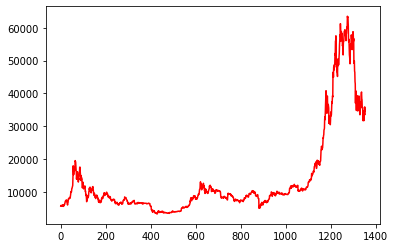

In [146]:
#Comparisson of BTC actual values and predicted values
#plt.figure(figsize=(14, 8))
#plt.plot(BTC_fitted.index, BTC_fitted, c='darkblue',label='Predicted Value')
plt.plot(BTC_fitted.index, BTC_actual, c='red',label='Actual BTC Value')
#plt.legend(prop=dict(size=15))
#plt.xlabel('DATE', fontsize=15)
#plt.show()

In [121]:
BTC_fitted

0       5.251424e+13
1       6.625246e+13
2       7.259449e+13
3       6.508587e+13
4       7.271620e+13
            ...     
1349    6.006242e+15
1350    6.141212e+15
1351    6.012398e+15
1352    6.156450e+15
1353    6.027027e+15
Length: 1354, dtype: float64

# Bayesian Regression¶

In [148]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train,y_train)
y_predict=reg.predict(X_test)

In [149]:
print(mean_squared_error(y_test, y_predict))

10916266.716870684


In [150]:
coef=reg.coef_

In [151]:
#BTC_actual=data_scaled[['Close']]  es y
BTC_fitted= X.dot(coef)
#acrual values is y
BTC_actual=y

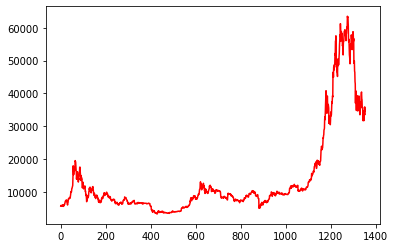

In [154]:
#Comparisson of BTC actual values and predicted values
#plt.figure(figsize=(14, 8))
#plt.plot(BTC_fitted.index, BTC_fitted, c='darkblue',label='Predicted Value')
plt.plot(BTC_fitted.index, BTC_actual, c='red',label='Actual BTC Value')
#plt.legend(prop=dict(size=15))
#plt.xlabel('DATE', fontsize=15)
#plt.show()

# ElasticNet 

In [142]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.0001, l1_ratio=0.5,normalize=False)
model.fit(X_train, y_train)
y_predict=reg.predict(X_test)

In [143]:
print(mean_squared_error(y_test, y_predict))

10916266.716870684


In [144]:
model.coef_

array([ 2.69263315e+02,  2.59474428e+02,  1.04308226e+02,  3.76963049e+03,
       -2.88395764e+03,  1.15162019e+04, -2.01805573e+02, -1.80978355e+01,
       -6.27440087e+01,  6.10687394e-01])

In [586]:
#Coefficients for each variable
coef = list(model.coef_)
count = 0
for i in X.columns:
    print(i,':',coef[count])
    count+= 1

AROONOSC_lag1 : 0.0034852923505982103
RSI_lag1 : -0.0
RSI1_lag1 : 0.01142857285654937
DX_lag1 : 0.0038680399481646906
AD_lag1 : 0.10642634384873408
OBV_lag1 : 0.07328293186382188
ATR_lag1 : 0.06474945481246612
NATR_lag1 : -0.1511765509819744
TRANGE_lag1 : 0.7826581067274684
CDLENGULFING_lag1 : -0.002606840947162683
CDLHANGINGMAN_lag1 : 0.00017576926266141138
CDLSHOOTINGSTAR_lag1 : 5.4012996158095144e-05
CDLHAMMER_lag1 : 0.0002688964817339358


In [587]:
#Forecast Values of BTC
BTC_fitted= X.dot(coef)
BTC_fitted.tail()

Date
2021-06-27    1.986563
2021-06-28    2.009079
2021-06-29    1.914264
2021-06-30    1.913477
2021-07-01    1.846690
dtype: float64

In [588]:
#Actual Values of BTC (scaled)
BTC_actual=data_scaled[['Close']]
BTC_actual.tail()

,Close
Date,
2021-06-27,1.533786
2021-06-28,1.517965
2021-06-29,1.623294
2021-06-30,1.562531
2021-07-01,1.454610


Text(0.5, 0, 'DATE')

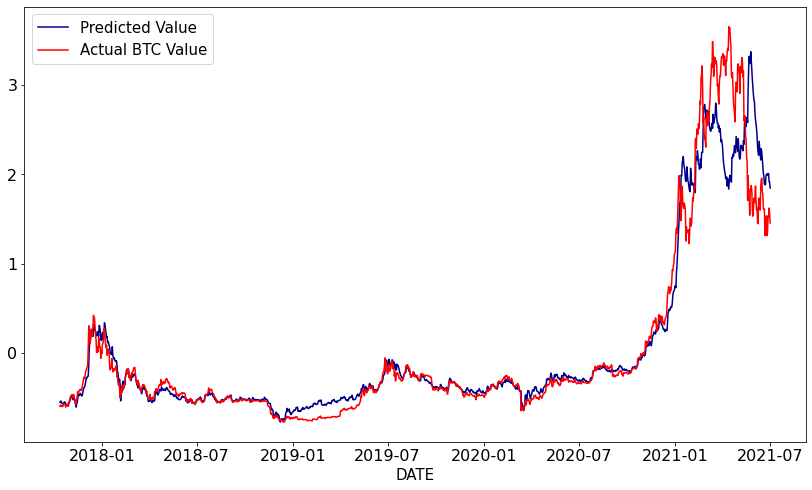

In [589]:
#Comparisson of BTC actual values and predicted values
plt.figure(figsize=(14, 8))
plt.plot(data_scaled.index, BTC_fitted, c='darkblue',label='Predicted Value')
plt.plot(data_scaled.index, BTC_actual, c='red',label='Actual BTC Value')
plt.legend(prop=dict(size=15))
plt.xlabel('DATE', fontsize=15)

### Mean Squared Error

In [509]:
y=BTC_actual
X=BTC_fitted

In [510]:
y=y.values.reshape(-1,1)
X=X.values.reshape(-1,1)

In [511]:
#Mean Squared Error
SR= np.square(X-y)
MSE= np.sum(SR)/len(data)
MSE

0.07050027810552596